<a href="https://colab.research.google.com/github/gurokeretcha/ML_interpretability/blob/main/ML_model_interpretability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML model Explainability



**dataset**: Medical Cost Personal Datasets
https://www.kaggle.com/mirichoi0218/insurance 

* **age**: age
* **sex**: insurance contractor gender, female, male
* **bmi**: Body mass index, providing an understanding of body, weights that are * * relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to * * * weight, ideally 18.5 to 24.9
* **children**: Number of children covered by health insurance / Number of dependents
* **smoker**: Smoking
* **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* **charges**: Individual medical costs billed by health insurance

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder,OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1. Linear Regression

### 1.1 Build a Model

In [ ]:
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data_linear_reg = pd.get_dummies(data,columns=['sex', 'smoker','region'], drop_first=True)
data_linear_reg.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [ ]:
col_names = ['age', 'bmi']
features = data_linear_reg[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
data_linear_reg[col_names] = features
data_linear_reg.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,0,16884.92400,0,1,0,0,1
1,-1.509965,0.509621,1,1725.55230,1,0,0,1,0
2,-0.797954,0.383307,3,4449.46200,1,0,0,1,0
3,-0.441948,-1.305531,0,21984.47061,1,0,1,0,0
4,-0.513149,-0.292556,0,3866.85520,1,0,1,0,0


In [ ]:
data_linear_reg.shape

(1338, 9)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data_linear_reg.drop(columns=["charges"]), data_linear_reg["charges"], test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1070, 8), (268, 8), (1070,), (268,))

In [ ]:
linear_reg = sm.OLS(y_train, x_train).fit()
linear_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.848
Model:                            OLS   Adj. R-squared (uncentered):              0.847
Method:                 Least Squares   F-statistic:                              741.4
Date:                Sun, 06 Mar 2022   Prob (F-statistic):                        0.00
Time:                        15:11:32   Log-Likelihood:                         -10991.
No. Observations:                1070   AIC:                                  2.200e+04
Df Residuals:                    1062   BIC:                                  2.204e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age               3597.5587    216.840     16.591      0.000    3172.076    4023.041
bmi               1616.2938    225.073      7.181      0.000    1174.656    2057.932
children          1425.2983    165.660      8.604      0.000    1100.239    1750.357
sex_male          2723.5349    395.021      6.895      0.000    1948.425    3498.645
smoker_yes        2.515e+04    526.022     47.817      0.000    2.41e+04    2.62e+04
region_northwest  5113.9574    509.501     10.037      0.000    4114.214    6113.701
region_southeast  5191.2327    497.413     10.436      0.000    4215.208    6167.257
region_southwest  4925.1772    496.155      9.927      0.000    3951.622    5898.732
==============================================================================
Omnibus:                      147.884   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              292.775
Skew:                           0.829   Prob(JB):                     2.66e-64
Kurtosis:                       4.955   Cond. No.                         5.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

here in the stats model we can observe, coef, std err, t-stats, p-value, confidence internval. based on the info, coeffiecient gives us info how much output changes if a unit change happends on the input. for example, if age is increased by 1


### 1.2 Prediction Result

In [ ]:
def pred_result(pred,y_test):
  score_MSE = round(mean_squared_error(pred, y_test))
  score_MAE = round(mean_absolute_error(pred, y_test))
  score_r2score = round(r2_score(pred, y_test),2)
  print(f"MSE: {score_MSE} | MAE: {score_MAE} | R2score: {score_r2score}")

In [ ]:
linear_pred = linear_reg.predict(x_test)
pred_result(linear_pred,y_test)

MSE: 46124128 | MAE: 5032 | R2score: 0.67


### 1.3 Global Interpretability

In [ ]:
err = linear_reg.params - linear_reg.conf_int()[0]
coef_df = pd.DataFrame({'coef': round(linear_reg.params),
                        'Standard Error': round(linear_reg.bse),
                        't_Stats': round(linear_reg.tvalues,1),
                        'error': round(err)
                       }).reset_index().rename(columns={"index":"columns"})
coef_df

,columns,coef,Standard Error,t_Stats,error
0,age,3598.0,217.0,16.6,425.0
1,bmi,1616.0,225.0,7.2,442.0
2,children,1425.0,166.0,8.6,325.0
3,sex_male,2724.0,395.0,6.9,775.0
4,smoker_yes,25153.0,526.0,47.8,1032.0
5,region_northwest,5114.0,510.0,10.0,1000.0
6,region_southeast,5191.0,497.0,10.4,976.0
7,region_southwest,4925.0,496.0,9.9,974.0


Interpretation:
- numeric feature(Age): An increase of the Age by 1 year, increases the predicted number of charges by 3598.0, when all other features remain fixed.
- categorical feature (smoker): when a person smokes the value is 25153.0 higher compared to the person who do not smoke  given all other features remain the same.


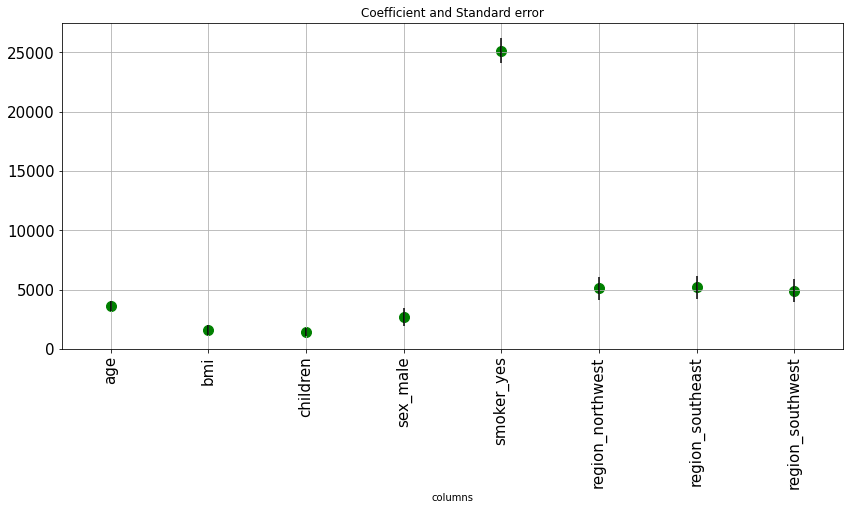

In [ ]:
coef_df.plot(y='coef', x='columns', kind='bar', color='none', yerr='error', legend=False, figsize=(14,6))
plt.scatter(x=np.arange(coef_df.shape[0]), s=100, y=coef_df['coef'], color='green')
plt.axhline(y=0, linestyle='--', color='black', linewidth=1)
plt.title("Coefficient and Standard error")
plt.grid()
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

This graph displays for each feature, the coefficient value as well as the standard error around this coefficient. As we can see from the graph, smoker feature have highest effect on prediction, whereas children number has lowest effect on prediction. 

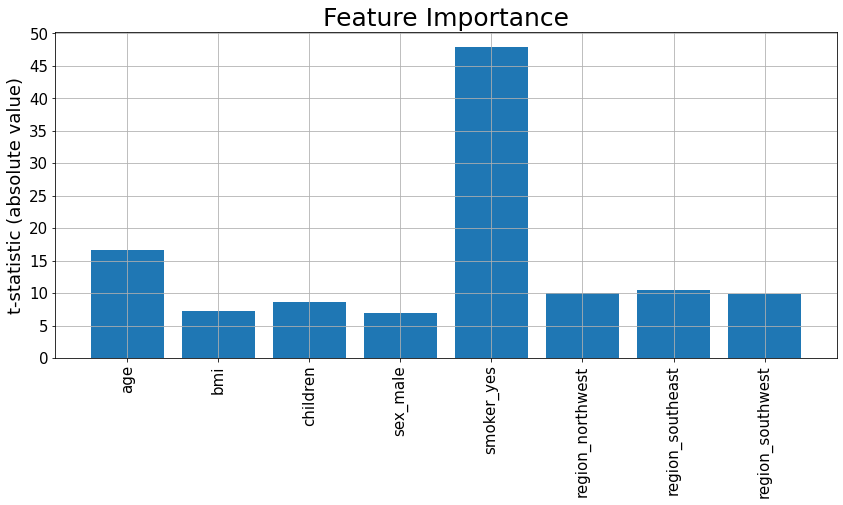

In [ ]:
plt.figure(figsize=(14,6))
plt.bar(linear_reg.tvalues.keys(), abs(linear_reg.tvalues.values))
plt.title("Feature Importance",fontsize=25)
plt.ylabel("t-statistic (absolute value)",fontsize=18)
plt.grid()
plt.xticks(rotation=90,fontsize=15)
plt.yticks(range( 0,int(max(round(linear_reg.tvalues)))+5,5) ,fontsize=15)
plt.show()

### 1.4 Local Interpretability

How much each feature contribute to a prediction for an instance?
lets take 5th data point

In [ ]:
forth_sample = x_test.iloc[4]
forth_sample

age                -1.438764
bmi                 0.206139
children            0.000000
sex_male            1.000000
smoker_yes          1.000000
region_northwest    1.000000
region_southeast    0.000000
region_southwest    0.000000
Name: 259, dtype: float64

In [ ]:
linear_reg.params

age                  3597.558670
bmi                  1616.293843
children             1425.298309
sex_male             2723.534925
smoker_yes          25152.905626
region_northwest     5113.957399
region_southeast     5191.232688
region_southwest     4925.177218
dtype: float64

In [ ]:
print("predicted: ",int(linear_reg.predict(forth_sample.values)))
print("actual: ",int(y_test.iloc[4])) 

predicted:  28147
actual:  33750


In [ ]:
# imagine what would be prediction if the guy is non-smoker
forth_sample.values[4] = 0
print("predicted non smoker: ",int(linear_reg.predict(forth_sample.values)))

predicted non smoker:  2994


In [ ]:
print("difference : ", 28147 - 2994 ) # same as smoker_yer weight.

difference :  25153


## 2. Lasso

### 2.1 Build a model

In [ ]:
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data_lasso = pd.get_dummies(data,columns=['sex', 'smoker','region'], drop_first=True)

In [ ]:
col_names = ['age', 'bmi']
features = data_lasso[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
data_lasso[col_names] = features
data_lasso.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,0,16884.92400,0,1,0,0,1
1,-1.509965,0.509621,1,1725.55230,1,0,0,1,0
2,-0.797954,0.383307,3,4449.46200,1,0,0,1,0
3,-0.441948,-1.305531,0,21984.47061,1,0,1,0,0
4,-0.513149,-0.292556,0,3866.85520,1,0,1,0,0


In [ ]:
search = GridSearchCV(Lasso(),
                      {'alpha':np.arange(0.1,200,1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=0
                      )

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data_lasso.drop(columns=["charges"]), data_lasso["charges"], test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1070, 8), (268, 8), (1070,), (268,))

In [ ]:
search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.000e-01, 1.100e+00, 2.100e+00, 3.100e+00, 4.100e+00, 5.100e+00,
       6.100e+00, 7.100e+00, 8.100e+00, 9.100e+00, 1.010e+01, 1.110e+01,
       1.210e+01, 1.310e+01, 1.410e+01, 1.510e+01, 1.610e+01, 1.710e+01,
       1.810e+01, 1.910e+01, 2.010e+01, 2.110e+01, 2.210e+01, 2.310e+01,
       2.410e+01, 2.510e+01, 2.610e+01, 2.710e+01, 2.810e+...
       1.681e+02, 1.691e+02, 1.701e+02, 1.711e+02, 1.721e+02, 1.731e+02,
       1.741e+02, 1.751e+02, 1.761e+02, 1.771e+02, 1.781e+02, 1.791e+02,
       1.801e+02, 1.811e+02, 1.821e+02, 1.831e+02, 1.841e+02, 1.851e+02,
       1.861e+02, 1.871e+02, 1.881e+02, 1.891e+02, 1.901e+02, 1.911e+02,
       1.921e+02, 1.931e+02, 1.941e+02, 1.951e+02, 1.961e+02, 1.971e+02,
       1.981e+02, 1.991e+02])},
             scoring='neg_mean_squared_error')

In [ ]:
search.best_params_

{'alpha': 74.1}

In [ ]:
lasso_reg = Lasso(alpha = 74.1)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=74.1)

### 2.2 Prediction Result

In [ ]:
lasso_pred = lasso_reg.predict(x_test)
pred_result(lasso_pred, y_test)

MSE: 34153021 | MAE: 4237 | R2score: 0.69


### 2.3 Global Interpretability

In [ ]:
coefficients = lasso_reg.coef_
coefficients

array([ 3538.80094888,  1929.03807812,   382.46263284,     0.        ,
       23189.07369806,     0.        ,    -0.        ,   -70.35599657])

In [ ]:
importance = np.abs(coefficients)
importance

array([ 3538.80094888,  1929.03807812,   382.46263284,     0.        ,
       23189.07369806,     0.        ,     0.        ,    70.35599657])

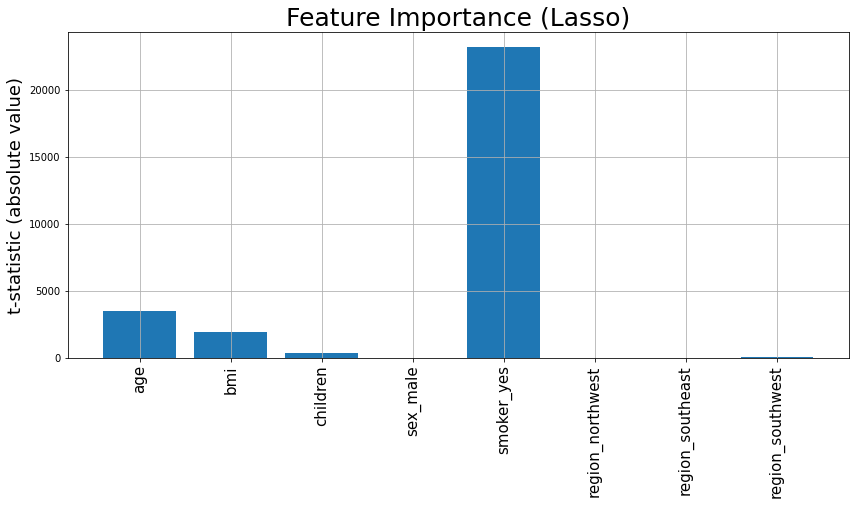

In [ ]:
plt.figure(figsize=(14,6))
plt.bar(x_train.columns, importance)
plt.title("Feature Importance (Lasso)",fontsize=25)
plt.ylabel("t-statistic (absolute value)",fontsize=18)
plt.grid()
plt.xticks(rotation=90,fontsize=15)
plt.show()

### 2.4 Local Interpretability

In [ ]:
forth_sample = x_test.iloc[4]
forth_sample

age                -1.438764
bmi                 0.206139
children            0.000000
sex_male            1.000000
smoker_yes          1.000000
region_northwest    1.000000
region_southeast    0.000000
region_southwest    0.000000
Name: 259, dtype: float64

In [ ]:
lasso_reg.coef_

array([ 3538.80094888,  1929.03807812,   382.46263284,     0.        ,
       23189.07369806,     0.        ,    -0.        ,   -70.35599657])

In [ ]:
print("predicted: ",int(lasso_reg.predict([forth_sample.values])))
print("actual: ",int(y_test.iloc[4]))

predicted:  26662
actual:  33750


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  "X does not have valid feature names, but"


## 3. Decision Tree

### 3.1 Build a model

In [ ]:
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
encoder = LabelEncoder()
data[['age','sex','smoker','region']] = data[['age','sex','smoker','region']].apply(encoder.fit_transform)
data_tree = data.copy()
data_tree.head()

,age,sex,bmi,children,smoker,region,charges
0,1,0,27.900,0,1,3,16884.92400
1,0,1,33.770,1,0,2,1725.55230
2,10,1,33.000,3,0,2,4449.46200
3,15,1,22.705,0,0,1,21984.47061
4,14,1,28.880,0,0,1,3866.85520


In [ ]:
tree_reg = DecisionTreeRegressor(random_state=42,max_leaf_nodes=5) # max_leaf_node =5 for simlicity

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data_tree.drop(columns=["charges"]), data_tree["charges"], test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

In [ ]:
tree_reg.fit(x_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=5, random_state=42)

### 3.2 Prediction result

In [ ]:
tree_pred = tree_reg.predict(x_test)
pred_result(tree_pred, y_test)

MSE: 26368109 | MAE: 3325 | R2score: 0.8


### 3.3. Global Interpretation

Feature: 0, Score: 0.08997
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.18054
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.72949
Feature: 5, Score: 0.00000


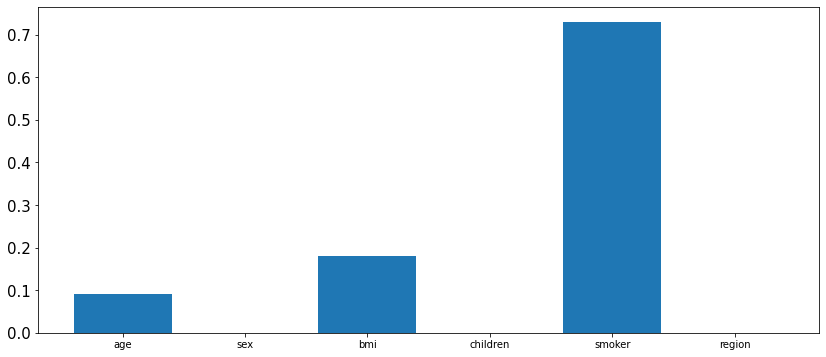

In [ ]:
importance = tree_reg.feature_importances_
plt.figure(figsize=(14,6))

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar(x_train.columns, importance)
plt.yticks(fontsize=15)
plt.show()

### 3.4 Local Interpretation

In [ ]:
#Individual predictions of a decision tree can be explained by decomposing the decision path into one component per feature.
forth_sample = x_test.iloc[4]
forth_sample

age          1.00
sex          1.00
bmi         31.92
children     0.00
smoker       1.00
region       1.00
Name: 259, dtype: float64

In [ ]:
print("predicted: ",int(tree_reg.predict([forth_sample.values])))
print("actual: ",int(y_test.iloc[4]))

predicted:  36691
actual:  33750


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
# test with visualization

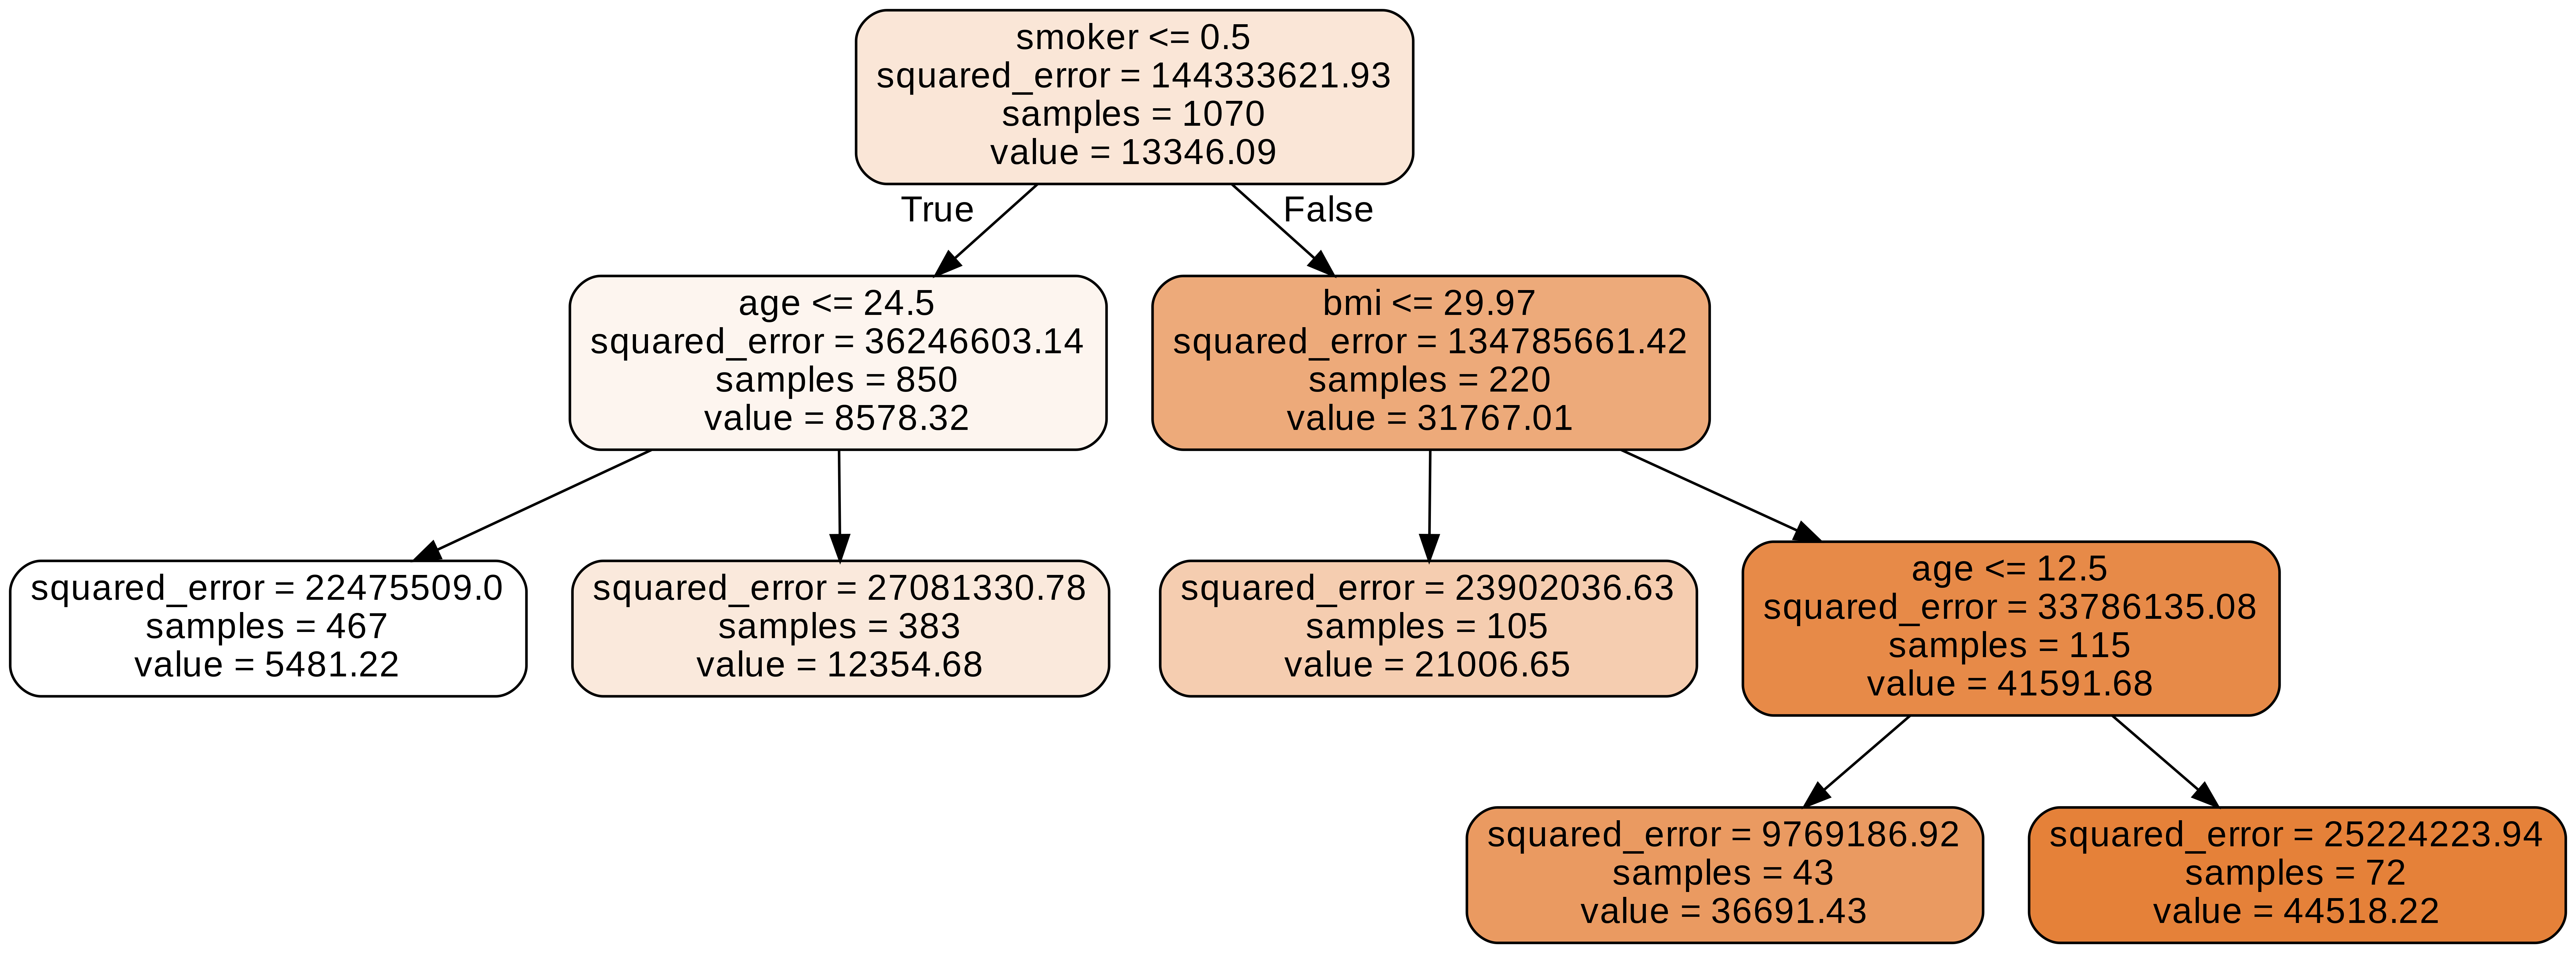

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
from subprocess import call
export_graphviz(tree_reg, out_file='tree.dot', 
                feature_names = x_train.columns,
                rounded = True, proportion = False, 
                precision = 2, filled = True)
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600']) # Convert to png using system command (requires Graphviz)
Image(filename = 'tree.png')